In [1]:
import torch
from torch import nn

#Torch vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#Import matplotlib for visualization
import matplotlib.pyplot as plt

#Check versions
print(torch.__version__)
print(torchvision.__version__)



2.6.0+cu124
0.21.0+cu124


# Getting the dataset

In [2]:
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 8.95MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 178kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.28MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 5.48MB/s]


In [3]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [4]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

# Visualizing

In [5]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image Shape: {image.shape}")
# image

Image Shape: torch.Size([1, 28, 28])


In [6]:
newimg = image.permute(1,2,0)

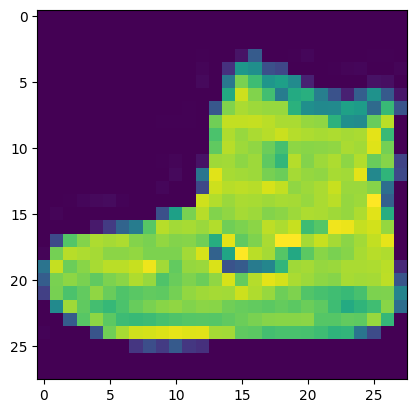

In [7]:
plt.imshow(newimg)

In [8]:
image.shape

torch.Size([1, 28, 28])

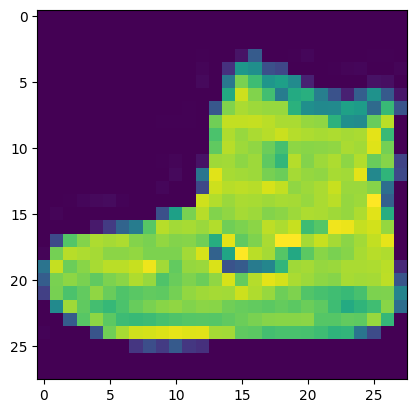

In [9]:
plt.imshow(image.squeeze())

#  Data Loader

In [10]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [11]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [12]:
from torch.utils.data import DataLoader

#Setup the batch size hyperparam
Bsize = 32

#Turn dataset to iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=Bsize,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=Bsize,
                             shuffle=False)

train_dataloader


In [13]:
#check out whats inside the training dataloader

train_features_batch, train_labels_batch = next(iter(train_dataloader))

In [14]:
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'Bag')

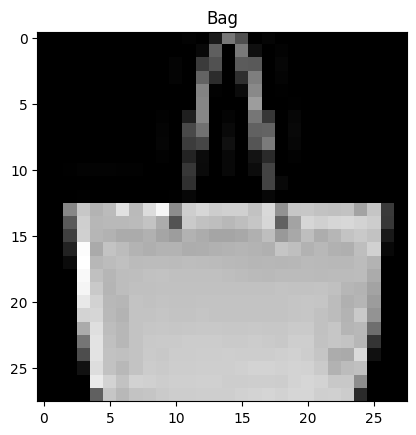

In [15]:
#Show a sample
# torch.manual_seed(42)

random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label.item()])

#Model Building

In [16]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
             input_shape:int,
             hidden_units:int,
             output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(hidden_units, output_shape)

        )
    def forward(self,x):
        return self.layer_stack(x)


In [17]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=10
).to("cpu")




In [18]:
dummyx = torch.rand([1,1,28,28])

In [19]:
model_0.eval()
model_0(dummyx)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [20]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [21]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
    print("Python file already exists")
else:
    print("Downloading...")
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

# from helper_functions import plot_predictions, plot_decision_boundary

Downloading...


In [22]:
from helper_functions import accuracy_fn

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer =torch.optim.SGD(params=model_0.parameters(),lr=0.1)


## Function for timing exp

In [24]:
from timeit import default_timer as timer

def print_train_time(start, end, device):
    total_time = end - start
    print(f"Train time on {device}:{total_time:.3f} seconds")
    return total_time

## Create a training loop
1. Loop Through Epochs
2. Loop Through training batches, perform training steps, calculate the train loss


In [25]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n-----")

    #Training
    train_loss = 0
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)

        #Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss

        #Optimizer zero grad
        optimizer.zero_grad()

        #loss backward
        loss.backward()

        #Optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)}/ {len(train_dataloader.dataset)} samples.")

    #Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    #Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)

            test_loss += loss_fn(test_pred, y_test)

            test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
        #Calculate test loss avg
        test_loss /= len(test_dataloader)
        #Calculate the test acc
        test_acc /= len(test_dataloader)

    print(f"\n Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu,"cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
-----
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

 Train Loss: 0.5904 | Test Loss: 0.5095, Test Acc: 82.0387
Epoch: 1 
-----
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

 Train Loss: 0.4763 | Test Loss: 0.4799, Test Acc: 83.1969
Epoch: 2 
-----
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

 Train Loss: 0.4550 | Test Loss: 0.4766, Test Acc: 83.4265
Train time on cpu:31.737 seconds


# Make Predictions and Get Results Function

In [26]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
    """
    Returns a dictionary containing the results of model predicting on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name":model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

# Setting up device agnostic code

In [27]:
# device = "cuda" if torch.cuda.is_available() else "cpu"

# model_1 = FashionMNISTModelV0(28*28,10,10).to(device)

# epochs = 5

# batch_size = 32

# for epoch in range(epochs):
#     loss_full = 0
#     for batchnumber, (X,y) in enumerate(train_dataloader):
#         X = X.to(device)
#         y = y.to(device)
#         model_1.train()
#         y_preds = model_1(X)

#         # y_preds = y_preds.to("cpu")

#         loss = loss_fn(y_preds,y)

#         loss_full += loss.item()

#         #Optimzer zero grad
#         optimizer.zero_grad()

#         loss.backward()

#         optimizer.step()

#     print(f"Train Loss: {loss_full/len(train_dataloader):.4f}")

#     model_1.eval()
#     with torch.inference_mode():
#         X_test, y_test = next(iter(test_dataloader))
#         X_test = X_test.to(device)
#         y_test = y_test.to(device)

#         y_preds_test = model_1(X_test)
#         loss = loss_fn(y_preds_test, y_test)
#         print(f"Test Loss:{loss:.4f}")


In [28]:
device

NameError: name 'device' is not defined

In [29]:
!nvidia-smi

Fri Jun 13 17:11:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [30]:
#Setup device
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [31]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units,output_shape),
            nn.ReLU()
        )
    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)


In [32]:
#Create an instance of model
modelv1 = FashionMNISTModelV1(784,10,10).to(device)
modelv1.parameters()


<generator object Module.parameters at 0x7df6f71918c0>

In [33]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=modelv1.parameters(),lr=0.1)


# Creating Training and Evaluation Functions

In [34]:
def train_step(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optmizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
    """Performs a training with model trying to learn on data_loader.
            model:torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optmizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device
    """
    train_loss, train_acc = 0,0

    model.train()

    for batch, (X,y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)

        acc = accuracy_fn(y, torch.argmax(y_pred, dim=1))

        train_loss += loss
        train_acc += acc

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    #Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}")


In [35]:
def test_step(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device:torch.device=device):
    """Performs a testing with model trying to learn on data_loader.
            model:torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device:torch.device=device
               """
    test_loss, test_acc = 0,0

    model.eval()
    with torch.inference_mode():
        for batch, (X,y) in enumerate(data_loader):
            X, y = X.to(device), y.to(device)

            y_pred = model(X)

            loss = loss_fn(y_pred, y)

            acc = accuracy_fn(y, torch.argmax(y_pred, dim=1))

            test_loss += loss
            test_acc += acc

        #Divide total train loss and acc by length of train dataloader
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

In [36]:
torch.manual_seed(42)

#Measure time
from timeit import default_timer as timer
time_start = timer()

epochs = 3

for epochs in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n ---------")
    train_step(modelv1,train_dataloader,loss_fn, optimizer,accuracy_fn, device)
    test_step(modelv1,test_dataloader,loss_fn,accuracy_fn,device)

time_end = timer()
totaltime = print_train_time(time_start, time_end,"gpu")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 2 
 ---------
Train Loss: 1.11456 | Train Acc: 58.46
Test Loss: 0.96320 | Test Acc: 63.41%
Epoch: 2 
 ---------
Train Loss: 0.90905 | Train Acc: 64.87
Test Loss: 0.74544 | Test Acc: 72.61%
Epoch: 2 
 ---------
Train Loss: 0.59508 | Train Acc: 78.25
Test Loss: 0.49708 | Test Acc: 82.77%
Train time on gpu:30.241 seconds


In [37]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device=device):
    """
    Returns a dictionary containing the results of model predicting on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X,y = X.to(device), y.to(device)
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name":model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc}

In [38]:
model_results = eval_model(modelv1,
                           test_dataloader,
                           loss_fn,
                           accuracy_fn, device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [39]:
model_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.49707889556884766,
 'model_acc': 82.76757188498402}

https://poloclub.github.io/cnn-explainer/

https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

# Creating Convolutional Neural Networks

In [102]:
import torch
from torch import nn
class FashionMNISTModelV2(nn.Module):
    """
    Model Architecture that replicates the TinyVGG model from CNN explainer
    """
    def __init__(self,
                 input_shape :int,
                 hidden_units: int,
                 output_shape: int
                 ):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels= hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                hidden_units,
                hidden_units,
                3,
                1,
                1
            ),
            nn.ReLU(),
            nn.Conv2d(
                hidden_units,
                hidden_units,
                3,
                1,
                1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= 490,
                      out_features=output_shape)
        )
    def forward(self,x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        return x


In [103]:
image.shape

torch.Size([1, 1, 28, 28])

In [104]:
torch.manual_seed(78)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)


# Exploring nn.Conv2d() and maxpool layers

In [50]:
images = torch.rand(size=(32,3,64,64))
test_image = images[0]

test_image.shape

torch.Size([3, 64, 64])

In [ ]:
model_2.state_dict()

In [60]:
# Create single conv2d layer

conv_layer = nn.Conv2d(3,
                       4,
                       3,
                       1,
                       1)
out = conv_layer(test_image)
out.shape


torch.Size([4, 64, 64])

In [61]:
max_layer = nn.MaxPool2d(2)
out2 = max_layer(test_image)
out2.shape

torch.Size([3, 32, 32])

In [63]:
image.shape

torch.Size([1, 28, 28])

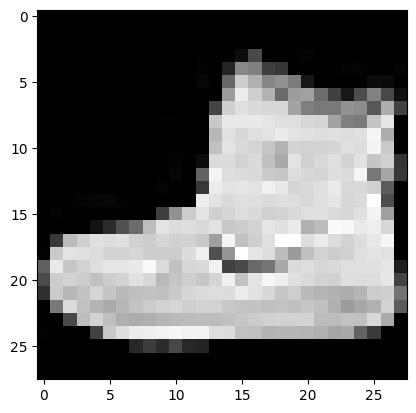

In [66]:
plt.imshow(image.permute(1,2,0), cmap='gray')

In [68]:
image = image.to(device)

In [97]:
image = image.unsqueeze(0)
image.shape

torch.Size([1, 1, 28, 28])

In [98]:
model_2(image)

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])


tensor([[ 0.0299,  0.0275, -0.0390, -0.0072,  0.0269,  0.0114,  0.0436, -0.0003,
          0.0121,  0.0252]], device='cuda:0', grad_fn=<AddmmBackward0>)

# Setting up Loss Function and optimizer

In [99]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)



In [ ]:
model_2.state_dict()

# Training and testing with functions

In [105]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    train_step(
        model=model_2,
        data_loader = train_dataloader,
        loss_fn=loss_fn,
        optmizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(
        model=model_2,
        data_loader = test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Train Loss: 2.30285 | Train Acc: 9.79
Test Loss: 2.30280 | Test Acc: 9.80%
Epoch: 1

Train Loss: 2.30285 | Train Acc: 9.79
Test Loss: 2.30280 | Test Acc: 9.80%
Epoch: 2

Train Loss: 2.30285 | Train Acc: 9.79
Test Loss: 2.30280 | Test Acc: 9.80%


In [106]:
# Save the Model

In [110]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = '03_cv_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print("Saving the model to",MODEL_SAVE_PATH)

torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to models/03_cv_model_2.pth


In [111]:
# Create a new instance
load_model = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names))

In [112]:
load_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>